<center>Autorzy projektu: Michalina Oleksy, Piotr Kolecki</center>

<center><h1>Analiza danych dotyczących występowania Pokemonów z gry PokemenGO na urządzenia mobilne</h1></center>
<br>
<br>
Projekt został wykonany w Jupyter Notebook-u - darmowym oraz otwartym narzędziu pozwalającym w łatwy sposób analizować dane przy użyciu różnych języków programowania. Został wykorzystany język skryptowy Python 2.
<br>
<br>
<br>

<center><h2> Wstęp </h2></center>
<br>
PokemonGO jest grą typu multiplayer na urządzenia mobilne z systemem iOS i Android, która wykorzystuje położenie geograficzne i technologię rozszerzonej rzeczywistości - system, który łączy świat rzeczywisty z generowanym komputerowo. Została stworzona przez Niantic Inc., a jej premiera nastąpiła w wybranych krajach w lipcu 2016 roku. Gra polega na przemieszczaniu się w realnym świecie w celu złapania Pokemona, który znajduje się w określonym położeniu. Gracze mają także możliwość trenowania złapanych Pokemonów, ewoluowania ich, oraz brania udziału w pojedynkach.
Mapa gry zbudowana jest na realnej mapie Ziemi, na której zostały oznaczone punkty charakterystyczne - zabytki, muzea, pomniki, fontanny, etc. (oparte na danych zebranych przez Niantic Inc. w czasie produkcji ich poprzedniej gry “Ingress”, w której gracze mogli takie punkty sami oznaczać). Punkty te są interpretowane w PokemonGO jako PokeStop, lub Gym.
<br>
<br>

<center><h2>Dane</h2></center>
<br>
Zbiór danych składa się z 296021 rekordów. Dane były zbierane w okresie od 2.08.16 do 08.08.16. Ich źródłem jest: https://www.kaggle.com/semioniy/predictemall.
Część danych może być obarczona niewielkim błędem związanym z niedokładnością określania lokalizacji lub opóźnieniem.
Ponadto, pomimo uzyskania blisko 300 tysięcy rekordów, dane mogą posiadać braki wynikające z ograniczonego okresu zbierania danych.
<br>
<br>

<center><h2>Cel projektu</h2></center>
<br>
Celem projektu jest analiza zebranych danych pod kątem częstości występowania rzadkich i powszechnych gatunków Pokemonów na określonych obszarach oraz ich pojawiania się w zależności od godziny czasu lokalnego. Do celów analizy wybrano dwie próby losowe składające się z 21 najrzadziej występujących gatunków oraz 21 najczęściej występujących gatunków. Również porównano otrzymane wyniki dla obu grup.
<br>
<br>

<center><h2>Podstawy teoretyczne</h2></center>
<br>
* **Populacja statystyczna** – zbiór elementów podlegających badaniu statystycznemu. W przypadku tego projektu populacja jest skończona i byłyby to wszystkie pojawiające się Pokemony.
 
* **Próba losowa** - taki dobór elementów z populacji do próby statystycznej, w którym wszystkie elementy populacji mają znane szanse (znane prawdopodobieństwo) dostania się do próby. Próbą losową dla projektu jest blisko 300 tysięcy rekordów, pojawiających się Pokemonów  - dane te nie są w żaden sposób dobrane, lub faworyzowane, a są jedynie reprezentacją całej populacji.
 
* **Zmienna losowa** - funkcja przypisująca zdarzeniom elementarnym liczby - odwzorowanie przenoszące badania prawdopodobieństwa z niewygodnej przestrzeni probabilistycznej do dobrze znanej przestrzeni euklidesowej. Zmienne losowe to funkcje mierzalne względem przestrzeni probabilistycznych. Zjawiskom o charakterze losowym, którym nie można w oczywisty sposób przypisać jakiejś miary liczbowej, można przypisywać liczby według pewnego klucza tak, aby możliwe było ich porównywanie w interesującym nas aspekcie. W tym przypadku jest to na przykład funkcja przyporządkowująca pojawiającemu się pokemonowi ID.
 
* **Prawdopodobieństwo całkowite** - w matematycznej teorii prawdopodobieństwa, rodzina miar służących do opisu częstości lub pewności tego zdarzenia.
Definicja Laplace’a:
Niech dany będzie skończony zbiór 𝛀 wszystkich możliwych zdarzeń elementarnych; dowolny podzbiór A zbioru 𝛀 nazywa się wtedy zdarzeniem. Prawdopodobieństwem P(A) zajścia zdarzenia A nazywa się stosunek liczby zdarzeń elementarnych sprzyjających zdarzeniu A do liczby wszystkich możliwych zdarzeń elementarnych należących do zbioru 𝛀. Definicja ta zakłada więc nie wprost, iż wszystkie zdarzenia elementarne wzajemnie się wykluczają, a ich wystąpienia równie możliwe. Innymi słowy prawdopodobieństwo zajścia zdarzenia A to liczba: 
![equation](pa.png)
Gdzie | x | oznacza liczbę wszystkich elementów danego zbioru.
 
* **Odchylenie standardowe** - Mówi, jak szeroko wartości wielkości są rozrzucone wokół jej średniej. Oznaczenie: σx.
 
* **Kwantyl** - Kwantylem rzędu p, gdzie 0p1, w rozkładzie empirycznym Px zmiennej losowej X nazywamy taką wartość zmiennej losowej xp, dla której spełnione są nierówności:
![equation](quart1.png)
Oraz
![equation](quart2.png)
W szczególności, kwantylem rzędu p jest taka wartość xp zmiennej losowej, że wartości mniejsze lub równe od xp są przyjmowane z prawdopodobieństwem co najmniej p, zaś wartości większe lub równe od xp są przyjmowane z prawdopodobieństwem co najmniej 1-p.
 
* **Kwartyle** - są to kwantyle rzędu ¼; ½; ¾;
 
* **Moda** - wartość najczęstsza;
 
* **Mediana** - wartość średnia, kwantyl rzędu ½;
 
* **Wartość oczekiwana** - wartość określająca spodziewany wynik doświadczenia losowego. Wartość oczekiwana to inaczej pierwszy moment zwykły. Estymatorem wartości oczekiwanej rozkładu cechy w populacji jest średnia arytmetyczna.
 
* **Wariancja** - klasyczna miara zmienności. Intuicyjnie utożsamiana ze zróżnicowaniem zbiorowości. Jest średnią arytmetyczną kwadratów odchyleń (różnic) poszczególnych wartości cechy od wartości oczekiwanej.
 
* **Skośność** - wartość określająca jak bardzo wyniki dla danej zmiennej kształtują się wokół średniej, czy więcej wyników jest mniejszych - wartość dodatnia, czy większych - wartość ujemna;
 
* **Kurtoza** - wartość określająca jak bardzo wyniki są skupione wokół średniej, jak bardzo są “spłaszczone”;
 
* **Test t-studenta** - wykorzystywany, gdy posiadamy wyniki dla dwóch grup i chcemy porównać je ze sobą. Wzór na test t-Studenta dla prób niezależnych ma postać:
![equation](student.png)

* **Jądrowy estymator gęstośći** - nieparametryczny sposób przedstawienia funkcji gęstości prawdopodobieństwa.

* **Regresja liniowa** - metoda estymowania wartości oczekiwanej zmiennej y przy znanych wartościach innej zmiennej lub zmiennych x. Regresja w ogólności to problem estymacji warunkowej wartości oczekiwanej. Regresja liniowa jest nazywana liniową, gdyż zakładanym modelem zależności między zmiennymi zależnymi i niezależnymi, jest funkcja liniowa.
<br>
<br>

<center><h1>Analiza danych</h1></center>
<br>
W pierwszym kroku opisano obszary, z których dane zostały pobrane oraz dokonano analizy częstości pojawia się Pokemonów w tych lokalizacjach:
<br>
![title](all.png)
<br>
Ponieważ w posiadanej próbie na części tych obszarów pojawiały się niewielkie ilości Pokemonów, dokonano scalenia obszarów:
<br>
<br>
![title](three_freq.png)
<br>
Następnie przygotowano tabelę przedstawiającą ogólne częstości występowania Pokemonów, oraz prawdopodobieństwa ich wystąpienia w próbie losowej. W tym celu można zastosowano wzór na prawdopodobieństwo:
![equation](pa.png)
ponieważ występowania Pokemonów wzajemnie się wykluczają (Pokemon A nie może być jednocześnie Pokemonem B), a ich wystąpienia są równie możliwe.
<br>
<br>
![title](IDallall.png)

Patrząc na powyższą tabelę można zaobserwować, że niektóre Pokemony zupełnie nie 
występują, a pozostałe znacznie różnią się częstością występowania. Zgodnie z informacjami podawanymi przez twórców (Niantic Inc.) jedynymi Pokemonami, których obecnie nie da się złapać są: Ditto, Articuno, Zapdos, Moltres, Mewtwo oraz Mew. Z tego powodu Pokemony te należy odrzucić przy wyborze najrzadszych Pokemonów, gdyż nie mogą się one pojawić w grze.
Machamp posiadający częstość ‘0’, dlatego zostaje odrzucony z powodu braku danych. 





<center><h2>Najczęściej i najrzadziej występujące gatunki</h2></center>
<br>
Korzystając z bazy danych wyłoniono 21 najrzadziej, oraz 21 najczęściej pojawiających się gatunków. Dalsza analiza będzie przeprowadzona tylko na tych dwóch zestawach danych.
<br>
Na cele projektu zdefiniowano następujące pojęcia:
* *Pokemon powszechny* - jeden z 21 najczęściej występujących Pokemonów dla całej próby;
* *Pokemon rzadki* - jeden z 21 najrzadziej występujących Pokemonów dla całej próby;
* *Częstość występowania Pokemonów rzadkich* - sumaryczna częstość występowania 21 najrzadszych pokemonów, dla całej próby równa 241;
* *Częstość występowania Pokemonów powszechnych* - sumaryczna częstość występowania 21 najczęściej występujących Pokemonów, dla całej próby równa 236253.
<br>
Poniżej zaprezentowano obie grupy Pokemonów. Wykresy przedstawiają ilość występujących Pokemonów o danym ID, a tabele przyporządkowują numerom ID i częstościom nazwy Pokemonów pobrane ze strony producenta, która zawiera również informacje o częstości pojawianią się Pokemonów na całym świecie. Dane analizowane w tym projekcie w większości pokrywają się z tymi wynikami.
<br>
<br>

In [1]:
# Importujemy przydatne biblioteki
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ustawienie wielkości wykresów w Jupyter Notebook-u
%pylab inline
pylab.rcParams['figure.figsize'] = (16, 13)


sns.set_style('whitegrid') # styl renderowanych wykresów

# Funkcja pomocnicza do renderowania tabeli danych w jednym wierszu
# Skopiowana z https://stackoverflow.com/a/42866792
from IPython.display import display, HTML

def multi_column_df_display(list_dfs, cols=3, title=''):
    html_table = u"<table style='width:100%; border:0px'>{content}</table>"
    html_row = u"<tr style='border:0px'>{content}</tr>"
    html_cell = u"<td style='width:{width}%;vertical-align:top;border:0px'>{{content}}</td>"
    html_cell = html_cell.format(width=100/cols)

    cells = [ html_cell.format(content=df.to_html()) for df in list_dfs ]
    cells += (cols - (len(list_dfs)%cols)) * [html_cell.format(content="")] # pad
    rows = [ html_row.format(content="".join(cells[i:i+cols])) for i in range(0,len(cells),cols)]
    display(HTML(html_table.format(content="".join(rows))))

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Kolumny danych
POKE_ID = u'pokemonId'
CONTINENT = 'continent'
COLUMNS = ('pokemonId', 'latitude', 'longitude', 'appearedLocalTime', 'appearedHour', 'appearedDay',
           'city', 'temperature', 'population_density', 'class', 'continent', 'weather', 'appearedYear',
           'appearedMonth', 'closeToWater', 'terrainType', 'windSpeed', 'pressure', 'windBearing', 'urban',
           'suburban', 'midurban', 'rural', 'gymDistanceKm', 'pokestopDistanceKm', 'appearedDayOfWeek')

# Ładujemy dane o występowaniu pokemonów z pliku csv do pandas.DataFrame
df = pd.read_csv('data.csv', low_memory=False, usecols=COLUMNS)

# Ładujemy dane mapujące pokemonID do nazwy Pokemonów
rarest_names = pd.read_csv('rarest_names.csv', usecols=('ID', 'Nazwa', 'Częstość'))
most_common_names = pd.read_csv('most_common_names.csv', usecols=('PokemonID', 'Nazwa', 'Częstość'))

In [3]:
# Stałe określające ile najrzadszych i najczęstszych gatunków weźmiemy pod uwagę
MOST_COMMON_COUNT = 21
RARES_COUNT = 21

# Seria danych zawierająca występowanie pokemonów, posortowana malejąco
pokemon_occurences = df[POKE_ID].value_counts()

# Najczęstsze i najrzadsze pokemony
most_common_pokes_freq = pokemon_occurences[:MOST_COMMON_COUNT]
rarest_pokes_freq = pokemon_occurences[-RARES_COUNT:]

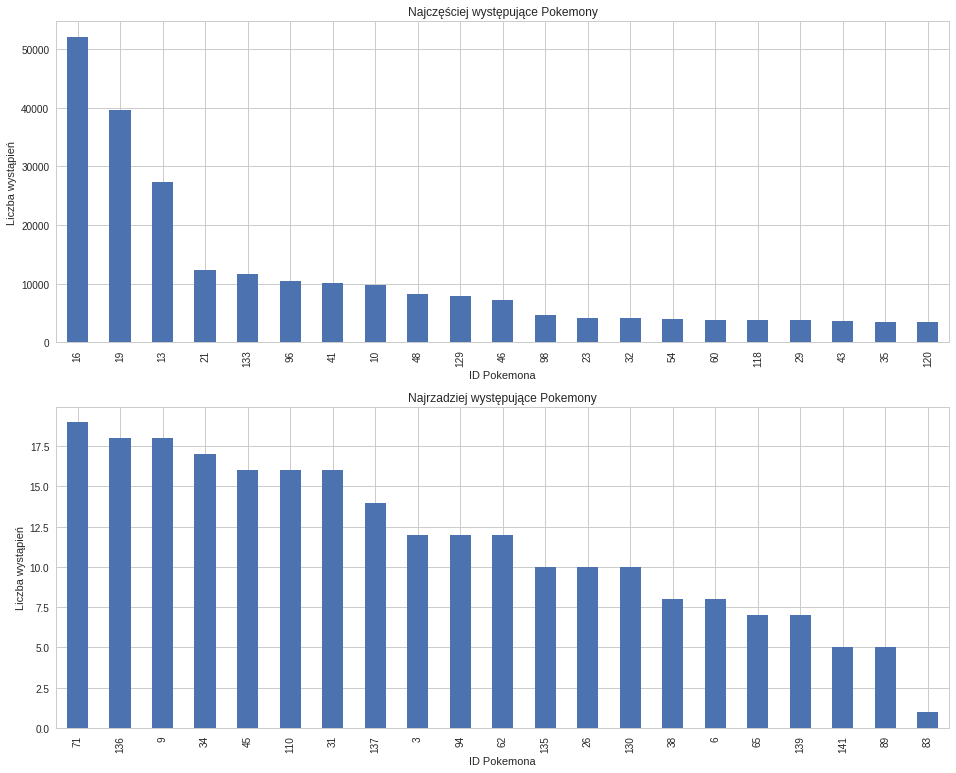

In [4]:
### Rysujemy wykresy

# Czyścimy axis (oś), figury oraz okno
plt.cla(); plt.clf(); plt.close()

fig, axes = plt.subplots(nrows=2, ncols=1)

p1 = most_common_pokes_freq.plot('bar', ax=axes[0], title=u'Najczęściej występujące Pokemony')
p2 = rarest_pokes_freq.plot('bar', ax=axes[1], title=u'Najrzadziej występujące Pokemony')

for p in (p1, p2):
    p.set_xlabel(u'ID Pokemona')
    p.set_ylabel(u'Liczba wystąpień')
    
plt.show()

In [5]:
# Renderujemy tabele występowania Pokemonów
rarest_pokes_freq_with_name = rarest_pokes_freq.rename(
    lambda pid: u'%s (%d)' % (rarest_names[rarest_names['ID']==pid]['Nazwa'].values[0], pid)
)

most_common_pokes_freq_with_name = most_common_pokes_freq.rename(
    lambda pid: u'%s (%d)' % (most_common_names[most_common_names['PokemonID']==pid]['Nazwa'].values[0], pid)
)

df1 = pd.DataFrame({u'Liczba wystąpień': most_common_pokes_freq_with_name})
df1.index.name = u'Nazwa (ID) Pokemona'

df2 = pd.DataFrame({u'Liczba wystąpień': rarest_pokes_freq_with_name})
df2.index.name = u'Nazwa (ID) Pokemona'

multi_column_df_display([df1, df2])


,Liczba wystąpień
Nazwa (ID) Pokemona,
Pidgey (16),52114
Rattata (19),39637
Weedle (13),27367
Spearow (21),12337
Eevee (133),11740
Drowzee (96),10505
Zubat (41),10143
Caterpie (10),9854
Venonat (48),8325


<h2><center>Występowanie a lokalizacja</h2></center>
<br>
W kolejnym kroku zbadano częstość występowania Pokemonów w zależności od kontynentu według kategorii, których scalenia dokonano powyżej.
<br>
<br>

In [6]:
from collections import OrderedDict

# Mapujemy lokalizację na kontynenty
AMERICA = u'Ameryka'
EUROPE = u'Europa'
OTHER = u'Pozostałe'

CONTINENT_LOCATIONS = OrderedDict((
    (AMERICA, ('America', 'America/Indiana', 'America/Argentina', 'America/Kentucky')),
    (EUROPE, ('Europe',)),
    (OTHER, ('Asia', 'Africa', 'Australia', 'Indian', 'Pacific', 'Atlantic')),
))

# Przygotowujemy słownik mapujący
# zgodnie z https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html
continent_mappings = {}
continent_mappings.update({val: AMERICA for val in CONTINENT_LOCATIONS[AMERICA]})
continent_mappings.update({val: EUROPE for val in CONTINENT_LOCATIONS[EUROPE]})
continent_mappings.update({val: OTHER for val in CONTINENT_LOCATIONS[OTHER]})

# Zmieniamy nazwy lokalizacji - łącząc niektóre z nich w kontynenty (oraz grupę "Pozostałe")
df[CONTINENT] = df[CONTINENT].map(continent_mappings)

In [7]:
# Pobieramy ID najczęstszych i najrzadszych Pokemonów
most_common_pokes_ids = most_common_pokes_freq.axes[0]
rarest_pokes_ids = rarest_pokes_freq.axes[0]

In [8]:
# Definiujemy funkcję która wyrenderuje tabelkę z statystykami
LWYSTAPIEN = u'Liczba wystąpień'
KONTYNENT = u'Kontynent'

def make_table(pokemon_ids):
    df_pokes = df[df[POKE_ID].isin(pokemon_ids)]
    
    # Grupujemy dane jako: Pokemon ID, Kontynent, Liczba wystąpień
    cols = [POKE_ID, CONTINENT] # kolumny, które nas interesują
    freq_tmp = df_pokes[cols].groupby(cols).size().to_frame()
    
    # Zamiania hierarchicznych kolumn na 'płaskie' - inaczej nie możemy grupować po kontynencie...
    df_freq = pd.DataFrame(freq_tmp.to_records())
    df_freq.columns = [POKE_ID, KONTYNENT, LWYSTAPIEN] # polskie nazwy kolumn
    
    # Tworzy DataFrame zawierający kombinację kontynentów oraz PokemonId - wypełnioną zerami
    # Robimy tak gdyż df_freq nie ma niektórych danych.
    product = (df_freq[POKE_ID].unique(), df_freq[KONTYNENT].unique())
    multiindex = pd.MultiIndex.from_product(product, names=[POKE_ID, KONTYNENT])
    df_freq_zeros = pd.DataFrame(0, index=multiindex, columns=[LWYSTAPIEN])

    # Nadpisujemy komórki df_freq_zeros wartościami z df_freq
    for _record_id, row in df_freq.iterrows():
        df_freq_zeros.loc[row[POKE_ID], row[KONTYNENT]] = row[LWYSTAPIEN]
        
    # Od teraz df_freq ma również wartości 0
    df_freq = df_freq_zeros
    df_freq = df_freq.reset_index()  # resetujemy indeks w celu łatwiejszego operowania na danych
    
    # Zgrupowane dane po kontynencie
    groupped = df_freq.groupby(KONTYNENT)[LWYSTAPIEN]
    
    # Suma wystąpień
    # Średnia wystąpień
    # Maksimum wystąpień Pokemonów w gatunkach
    # Minimum wystąpień Pokemonów w gatunkach
    
    # Tworzymy funkcję agregującą, ponieważ takiej nie ma - będzie ona wybierać najczęściej występującą wartość
    mode = lambda x: x.value_counts().index[0]
    
    # Tworzymy funkcję agregującą, która będzie zwracać percentyl danego rzędu
    def percentile(n):
        def _percentile(x):
            return np.percentile(x, n)
        _percentile.__name__ = 'percentile_%d' % n
        return _percentile
    
    aggregate_names_mapping = (
        ('sum', u'Suma'),
        ('mean', u'Średnia'),
        ('max', u'Wartość maksymalna'),
        ('min', u'Wartość minimalna'),
        ('std', u'Odchylenie standardowe'),
        ('median', u'Mediana'),
        (mode, u'Moda'),
        ('var', u'Wariancja'),
        ('skew', u'Skośność'),
        #('kurt', u'Kurtoza'),
        (percentile(100), u'Kwartyl rzędu 1'),
        (percentile(75), u'Kwartyl rzędu 3/4'),
        (percentile(50), u'Kwartyl rzędu 1/2'),
        (percentile(25), u'Kwartyl rzędu 1/4'),
        (percentile(0), u'Kwartyl rzędu 0'),
    )
    aggregated = groupped.agg([a[0] for a in aggregate_names_mapping])
    aggregated[u'Rozstęp'] = aggregated[u'max'] - aggregated[u'min']
    aggregated.columns = [a[1] for a in aggregate_names_mapping] + [u'Rozstęp']
    
    return aggregated, df_freq

In [9]:
import seaborn as sns

# Definiujemy funkcję do rysowania wykresów liczby wystąpień danych pokemonów dla kontynentów
CONTINENTS_NAMES = CONTINENT_LOCATIONS.keys()

# Dostosowujemy wielkość wykresów
pylab.rcParams['figure.figsize'] = (16, 20)


# Funkcja rysująca wykresy dla kontynentów
def plot_continents_pokes_freq(plot_name_prefix, pokes_df):
    # Czyścimy axis (oś), figury oraz okno
    plt.cla(); plt.clf(); plt.close()

    # Tworzymy figurę i podwykresy (dzięki czemu możemy wstawić wykres na podany wiersz)
    fig, axes = plt.subplots(nrows=len(CONTINENTS_NAMES), ncols=1)

    # Maksymalna wartość y
    max_y = pokes_df[LWYSTAPIEN].max()
    
    # Filtrujemy dane oraz tworzymy wykresy częstości pokemonów
    for ax_idx, continent_name in enumerate(CONTINENTS_NAMES):
        pokes_for_continent = pokes_df.loc[pokes_df[KONTYNENT] == continent_name]

        p = pokes_for_continent.plot(
            x=POKE_ID, y=LWYSTAPIEN, kind='bar', ax=axes[ax_idx],
            title=u'%swystępujące Pokemony dla lokalizacji: %s' % (plot_name_prefix, continent_name)
        )
        p.set_ylim([0, max_y])
        p.set_xlabel(u'ID Pokemona')
        p.set_ylabel(u'Liczba wystąpień')

    plt.show()  # wyświetlamy figurę/wykresy
    

# Funkcja rysująca wykresy dla kontynentów
def plot_kde(plot_name_prefix, pokes_df, bw=0.7):
    # Czyścimy axis (oś), figury oraz okno
    plt.cla(); plt.clf(); plt.close()

    # Tworzymy figurę i podwykresy (dzięki czemu możemy wstawić wykres na podany wiersz)
    fig, axes = plt.subplots(nrows=len(CONTINENTS_NAMES), ncols=1)

    # Filtrujemy dane oraz tworzymy wykres estymatora gęstości
    for ax_idx, continent_name in enumerate(CONTINENTS_NAMES):
        pokes_for_continent = pokes_df.loc[pokes_df[KONTYNENT] == continent_name]
        
        x = pokes_for_continent[LWYSTAPIEN].values
        
        # `bw` może być jednym z 'scott', 'silverman', skalarem lub parą skalarów
        # Określa metodę doboru rozmiaru jądra lub współczynnika skalarnego lub wsp. skalarnego dla wielu wymiarów
        ax = sns.kdeplot(x, bw=bw, ax=axes[ax_idx])
        
        ax.set_title(u'Jądrowy estymator gęstości dla %swystępujących Pokemonów dla lokalizacji: %s' \
                     % (plot_name_prefix.lower(), continent_name))
        ax.set_xlabel(u'Liczba wystąpień pokemonów')
        ax.set_ylabel(u'Jądrowy estymator gęstości')
    
    plt.show()  # wyświetlamy figurę/wykresy

<h2><center>Najrzadziej występujące pokemony</h2></center>

In [10]:
rare_aggr, rare_df = make_table(rarest_pokes_ids)  # przetwarzamy dane
display(rare_aggr)                                 # wyświetlamy tabelę statystyk


,Suma,Średnia,Wartość maksymalna,Wartość minimalna,Odchylenie standardowe,Mediana,Moda,Wariancja,Skośność,Kwartyl rzędu 1,Kwartyl rzędu 3/4,Kwartyl rzędu 1/2,Kwartyl rzędu 1/4,Kwartyl rzędu 0,Rozstęp
Kontynent,,,,,,,,,,,,,,,
Ameryka,128,6.095238,16,0,3.548306,6,6,12.590476,0.781834,16,8,6,4,0,16
Europa,87,4.142857,10,0,3.410069,3,2,11.628571,0.291638,10,8,3,2,0,10
Pozostałe,26,1.238095,4,0,1.179185,1,0,1.390476,0.702831,4,2,1,0,0,4


<br>
* Na podstawie powyżych tabeli można zaobserwować, że najwięcej rzadkich Pokemonów pojawiło się na obszarze Ameryki, oraz *średnia występowania Pokemonów* jest tam największa. Częstość występowania Pokemonów w Europie stanowi blisko ⅔ częstości występowania Pokemonów w Ameryce.
* *Odchylenie standardowe* oraz *wariancja* są bardzo podobne dla Ameryki i Europy (odpowiednio: 11,99; 3,46 oraz  11,07; 3,33), oznacza to że rozrzut częstości wokół średniej jest dla tych obszarów jest porównywalny.
* Dla wszystkich obszarów *wartość minimalna* - *kwartyl rzędu 0* - jest równa i wynosi zero. Na żadnym obszarze nie wystąpiły wszystkie rzadkie Pokemony.
* *Rozstęp* - różnica pomiędzy wartością największą a najmniejszą - dla wszystkich obszarów jest równy wartości maksymalnej.
* Dla całkowitej częstości *skośność* jest ujemna i wynosi -0,2272151289 - oznacza to, że więcej wartości znajduje się powyżej wartości średniej (skośność lewostronna). Jednak dla poszczególnych obszarów skośność jest dodatnia co oznacza, że więcej wartości znajduje się poniżej średniej (skośność prawostronna).
<br>

<br>
Następnie dokonano analizy występowania najrzadszych Pokemonów w zależności od kontynentu.
<br>

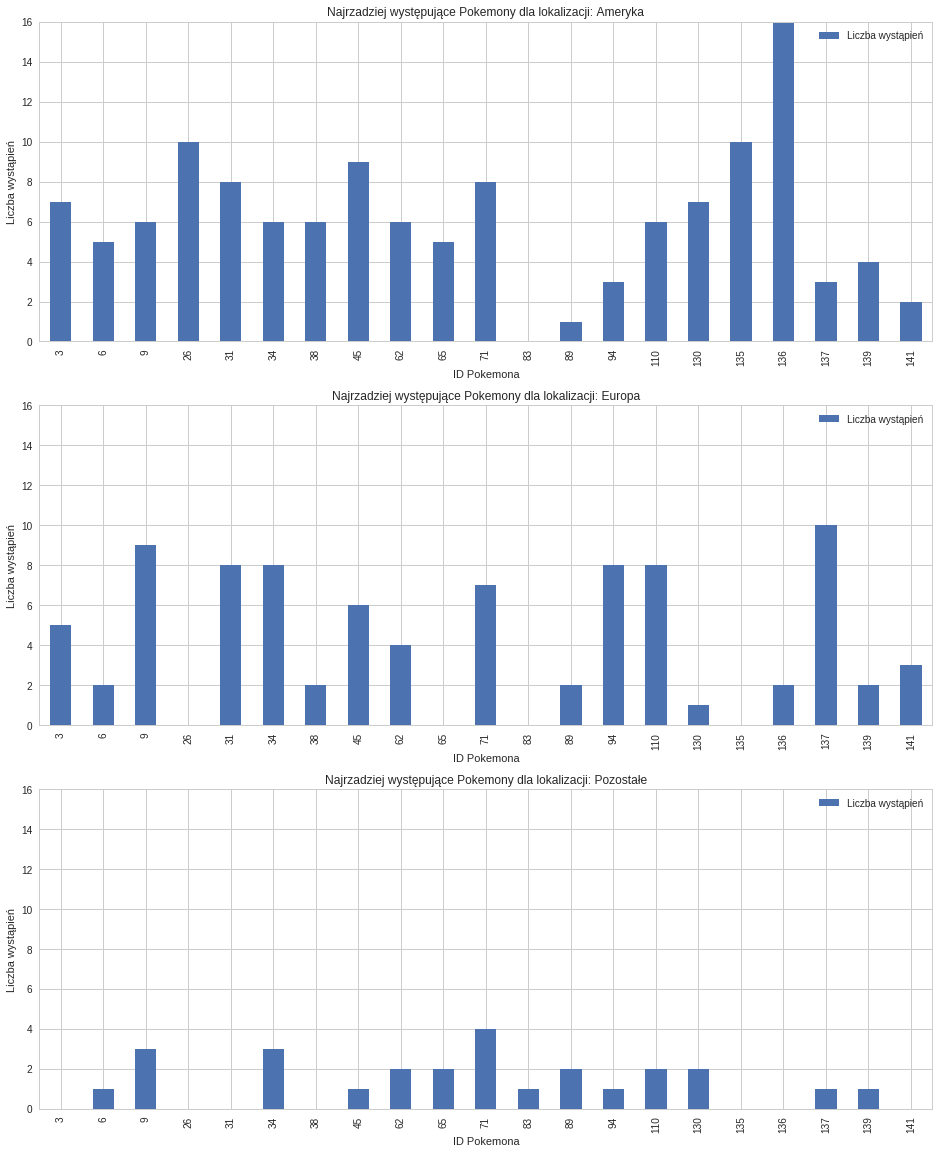

In [11]:
# wyświetlamy wykres
plot_continents_pokes_freq(plot_name_prefix=u'Najrzadziej ', pokes_df=rare_df)

<br>
**Ameryka** -mimo przeważającej liczby wystąpień liczby Pokemonów, w Ameryce nie pojawił się ani razu Farfetch’d. Występowanie pozostałych Pokemonów jest w miarę gładko rozłożone o czym świadczy dodatnia kurtoza wynosząca 1,915151408. Wyjątkowo często pojawiającym się rzadkim Pokemonem jest Flareon, którego częstość wynosi 16, która to liczba jest niemal trzy razy większa od średniej arytmetycznej.

**Europa** -razem z mniejszą ilością wystąpień Pokemonów w Europie, zwiększyła się liczba Pokemonów, które nie pojawiły się ani razu na tym obszarze. Na wykresie widoczne są "dziury" świadczące o tym, że dany Pokemon nie wystąpił na tym obszarze ani razu. 

** Pozostałe** -na pozostałych obszarach jeszcze więcej rzadkich Pokemonów nie wystąpiło ani razu, jednak pojawił się jedyny Farfetch’d w całej próbie. 
<br>

<h3><center>Najrzadziej występujące pokemony - jądrowy estymator gęstości</h3></center>

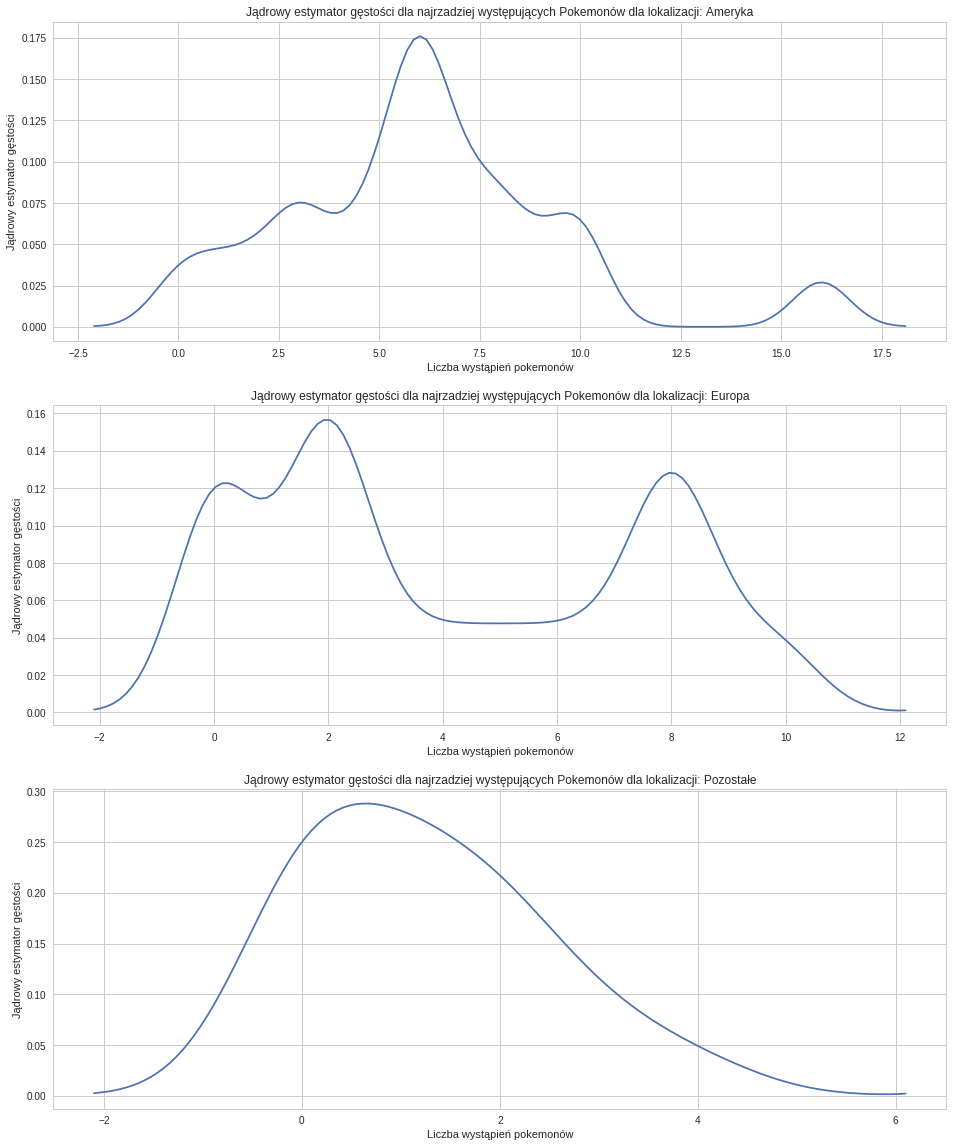

In [12]:
plot_kde(plot_name_prefix=u'Najrzadziej ', pokes_df=rare_df)

<br>
**Ameryka** - Dane są w miare skupione, poza dużym przesunięciem dla wartości 16, która to była częstością wystąpienia Flareona. Wartość ta mocno odstaje od pozostałych wartości co widać na wykresie jako dołek między wartościami 11 a 14.
 
**Europa** - Na tym wykresie można zaobserwować więcej wahań, spowodowanych zerowymi wartościami wśród danych, przeplatanych z wysokimi wartościami wystąpień Pokemonów. Na podstawie wykresu można zaobserwować, że na terenie Europy, konkretne rzadkie Pokemony pojawiały się albo w miarę rzadko, albo w miarę często.
 
**Pozostałe** - Dane dla tego wykresu są bardziej jednolite i skupione, przez co wykres jest bardzo słabo pofalowany. Wykres ten nie posiada wahań, zatem występowanie Pokemonów na tych obszarach było równomiernie rozłożone, żaden Pokemon nie odstaje ze swoją częstością występowania.
<br>
<br>


<h2><center>Najczęściej wystepujące pokemony</h2></center>

In [13]:
most_aggr, most_df = make_table(most_common_pokes_ids)  # przetwarzamy dane
display(most_aggr)                                      # wyświetlamy tabelę statystyk


,Suma,Średnia,Wartość maksymalna,Wartość minimalna,Odchylenie standardowe,Mediana,Moda,Wariancja,Skośność,Kwartyl rzędu 1,Kwartyl rzędu 3/4,Kwartyl rzędu 1/2,Kwartyl rzędu 1/4,Kwartyl rzędu 0,Rozstęp
Kontynent,,,,,,,,,,,,,,,
Ameryka,119048,5668.952381,26324,1495,6500.366067,3678,3166,42254759,2.435493,26324,4934,3678,2003,1495,24829
Europa,100840,4801.904762,22064,578,5596.947650,2291,2204,31325823,2.141328,22064,4950,2291,1611,578,21486
Pozostałe,16365,779.285714,3726,52,928.460015,437,3100,862038,2.545991,3726,744,437,353,52,3674


<br>
* Na podstawie powyższej tabeli można zaobserwować, że częstość występowania Pokemonów w Europie stanowi około ⅘ częstości występowania Pokemonów w Ameryce, a więc więcej niż w przypadku Pokemonów rzadkich.
* *Rozstęp* danych jest bardzo duży dla Ameryki i Europy, ale nie tak duży dla pozostałych obszarów, jednak spowodowane jest to mniejszą liczebnością tego zbioru.
* *Odchylenie standardowe* dla Ameryki i Europy jest mniej więcej równe połowie sumy wystąpień Pokemonów.
* *Wartości średnie* są niskie, niższe od średniej, co potwierdza *skośność* dodatnia informująca o tym, że większość danych znajduje się poniżej średniej.
<br>

<br>
Następnie dokonano analizy występowania najczęstszych Pokemonów w zależności od kontynentu.
<br>

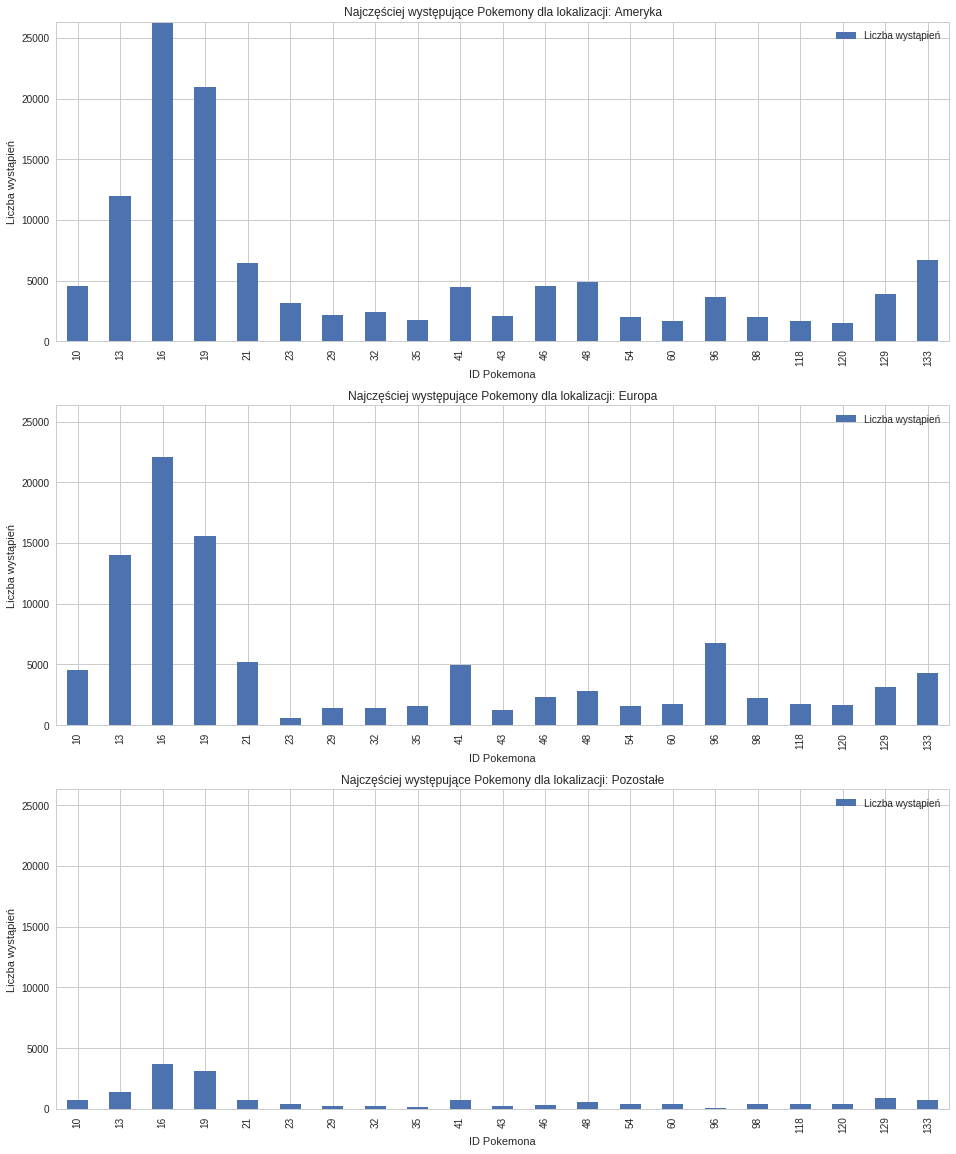

In [14]:
# wyświetlamy wykres
plot_continents_pokes_freq(plot_name_prefix=u'Najczęściej ', pokes_df=most_df)

<br>
**Ameryka** - na powyższym wykresie można zaobserwować, że trzy najczęstsze Pokemony: Pidgey, Rattata, Weedle pojawiają się szczególnie często i jako jedyne przekroczyły ilość wystąpień w Ameryce równą 10000. Pozostałe pokemony są do siebie podobnie powszechne, z kilkoma odstępstwami jak 21 i 133.

**Europa** - w Europie te same trzy Pokemony również pojawiają się najczęściej, jednak Weedle i Rattata w bliższych sobie wartościach. Tutaj również najczęściej pojawiającym się Pokemonem jest Pidgey. Na wykresie można zaobserwować kilka wartości dla pokemonów 21, 41, 96, które występują nieco częściej niż pozostałe, jednak jedynie blisko w 1/4 tak często jak najczęstsze trzy pokemony.

**Pozostałe** - wszystkie trzy powyższe wykresy są bardzo podobne. Na wszystkich pierwszymi trzema najliczniej pojawiającymi się pokemonami są: Pidgey, Rattata, Weedle. Na pozostałych obszarach stosunkowo rzadko pojawia się Drowzee, który to był jednym z najczęściej pojawiających się pokemonów w Europie. na tych obszarach wystepowanie pokemonów nie ma dużych wahań.

Na wszystkich trzech wykresach można zaobserwować stałą tendencję - na wszystkich kontynenatach trzy te same najczęstsze pokemony występują wyjątkowo często.
<br>
<br>

<h2><center>Test T-Studenta</h2></center>
<br>
* Formułujemy hipotezę zerową - “średnie dla obu grup są równe” oraz hipotezę alternatywną - “średnie dla obu grup nie są równe”.
* Określamy poziom istotności jako: 0.05.
* Korzystając ze wzoru podanego w punkcie “Teoria” testu t-studenta dla prób niezależnych, wykonujemy obliczenia.
<br>
**Średnia** dla rzadkich pokemonów: 11,47619048  
**Wariancja** dla rzadkich pokemonów: 24,05895692 (n1 = 21)  
**Średnia**  dla powszechnych pokemonów: 11250,14286  
**Wariancja**  dla rzadkich pokemonów: 157924736 (n2 = 21)  
**Liczba stopni swobody**: 20
<br>
<br>
Wartość testu T-Studenta wynosi: 4,09825828  
Wartość tablicowa: 2,0860  
<br>
<br>
Wartość testu T-Studenta nie zawiera się w powyższym przedziale, co implikuje sprzeczność tezy. Odrzucamy więc tę tezę i przyjmujemy, że średnie dla obu grup nie są równe.
<br>
<br>

<h3><center>Najczęściej występujące pokemony - jądrowy estymator gęstości</h3></center>

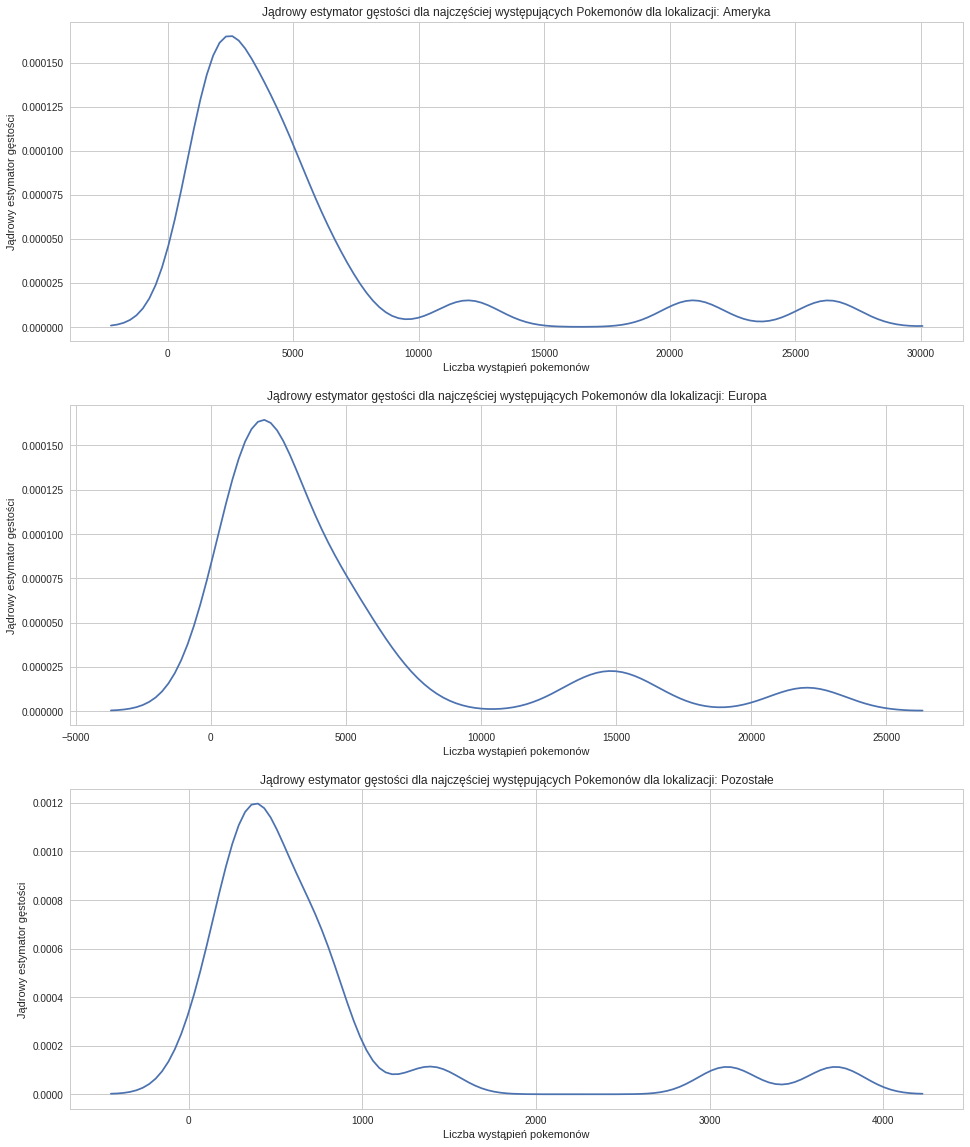

In [15]:
plot_kde(plot_name_prefix=u'Najczęściej ', pokes_df=most_df, bw='scott')


**Ameryka** - na wykresie można zaobserwować jeden duży garb - świadczący o tym, że Pokemony częste pojawiają się w podobnej częstości. Można również zauważyć trzy mniejsze garby odpowiadające trzem najczęściej występującym Pokemonom, co jest zgodne z poprzednim opisem wykresu częstości.

**Europa** - wykres jest bardzo podobny do wykresu dla Ameryki, jednak poza głównym garbem widoczne są tylko dwa mniejsze. Spowodowane jest to tym, że dwa z najczęstszych Pokemonów - Rattata oraz Weedle mają bardzo podobną częstość występowania.

**Pozostałe** - Wykres niemal identyczny jak w przypadku Ameryki, ponownie widoczne są trzy mniejsze garby.

Wszystkie trzy wykresy są podobne, z niewielkimi różnicami. Największe odchylenie wykresu interpretujemy jako częstość z jaką najczęściej pojawiają się powszechne Pokemony.
<br>
<br>
<br>

<h2><center>Analiza występowania rzadkich i częstych gatunków w zależności od godziny czasu lokalnego</h2></center>
<br>
<br>
W ostatnim kroku została przeprowadzona krótka analiza występowania najrzadszych oraz najczęstszych gatunków w zależności od godziny czasu lokalnego ich pojawienia się. Analiza została przeprowadzona na podstawie jądrowych estymatorów gęstości. Wykorzystano wykres Silvermana.
<br>
<br>

In [16]:
from sklearn import metrics, linear_model
import seaborn as sns
APPEARED_HOUR = 'appearedHour'

# Dostosowujemy wielkość wykresów
pylab.rcParams['figure.figsize'] = (16, 15)

def plot_kde_appeared_hour(pokes_ids, bw, name):
    df_pokes = df[df[POKE_ID].isin(pokes_ids)]
    # Grupujemy dane jako: Pokemon ID, Kontynent, Liczba wystąpień
    cols = [APPEARED_HOUR] # kolumny, które nas interesują
    freq_tmp = df_pokes[cols].groupby(cols).size().to_frame()
    
    # Zamiania hierarchicznych kolumn na 'płaskie' - inaczej nie możemy grupować po kontynencie...
    df_freq = pd.DataFrame(freq_tmp.to_records())
    df_freq.columns = [APPEARED_HOUR, LWYSTAPIEN] # polskie nazwy kolumn
    display(df_freq)
    sns.set_style('whitegrid')
    
    x, y = df_freq[APPEARED_HOUR].values, df_freq[LWYSTAPIEN].values
    
    # `bw` może być jednym z 'scott', 'silverman', skalarem lub parą skalarów
    # Określa metodę doboru rozmiaru jądra lub współczynnika skalarnego lub wsp. skalarnego dla wielu wymiarów
    ax = sns.kdeplot(x, y, bw=bw)
    ax.set_xlabel(u'Godzina pojawienia się pokemonów')
    ax.set_ylabel(u'Liczba wystąpień pokemonów')
    ax.set_title(u'Jądrowy estymator gęstości dla %s występujących pokemonów' % name)


# wykres regresji liniowej
def plot_appeared_hour_linear_regr(pokes_ids, name):
    df_pokes = df[df[POKE_ID].isin(pokes_ids)]
    # Grupujemy dane jako: Pokemon ID, Kontynent, Liczba wystąpień
    cols = [APPEARED_HOUR] # kolumny, które nas interesują
    freq_tmp = df_pokes[cols].groupby(cols).size().to_frame()
    
    # Zamiania hierarchicznych kolumn na 'płaskie' - inaczej nie możemy grupować po kontynencie...
    df_freq = pd.DataFrame(freq_tmp.to_records())
    df_freq.columns = [APPEARED_HOUR, LWYSTAPIEN] # polskie nazwy kolumn
    
    sns.set_style('whitegrid')
    
    x, y = df_freq[APPEARED_HOUR].values, df_freq[LWYSTAPIEN].values

    # sklearn linear_model potrzebuje dane w trochę innym formacie
    x = x.reshape(len(x), 1)
    y = y.reshape(len(x), 1)
    
    
    regr = linear_model.LinearRegression()
    regr.fit(x, y)               # dopasowanie/uczenie modelu
    
    y_predict = regr.predict(x)  # 'przewidywanie' wartości
    
    print("Współczynnik regresji liniowej: {}".format(regr.coef_))
    #print("Współczynnik korelacji R^2: {}".format(metrics.r2_score(y, y_predict)))
    
    # Współczynnik korelacji pearsona
    import scipy
    pearson_correl = scipy.stats.pearsonr(x, y)
    print("Współczynnik korelacji Pearsona: {}".format(pearson_correl))
    
    ax = plt.scatter(x, y,  color='black')
    plt.plot(x, y_predict, color='blue', linewidth=3, label=u'Regresja liniowa')
    
    plt.xlabel(u'Godzina pojawienia się pokemonów')
    plt.ylabel(u'Liczba wystąpień pokemonów')
    plt.title(u'Regresja liniowa godziny pojawienia się do liczby wystąpień %s pokemonów' % name)
    
    plt.show()
    
    return regr, x, y

<h3><center>Jądrowy estymator gęstości godziny występowania oraz liczby rzadkich pokemonów</h3></center>

Poniżej zaprezentowano tabelę zawierającą godziny oraz liczbę wystąpień rzadkich Pokemonów w danym czasie. Następnie użyto do analizy występowania wykres jądrowego estymatowa gęstości.
<br>
<br>

,appearedHour,Liczba wystąpień
0,0,21
1,1,15
2,2,10
3,3,17
4,4,14
5,5,15
6,6,15
7,7,5
8,8,8
9,9,8


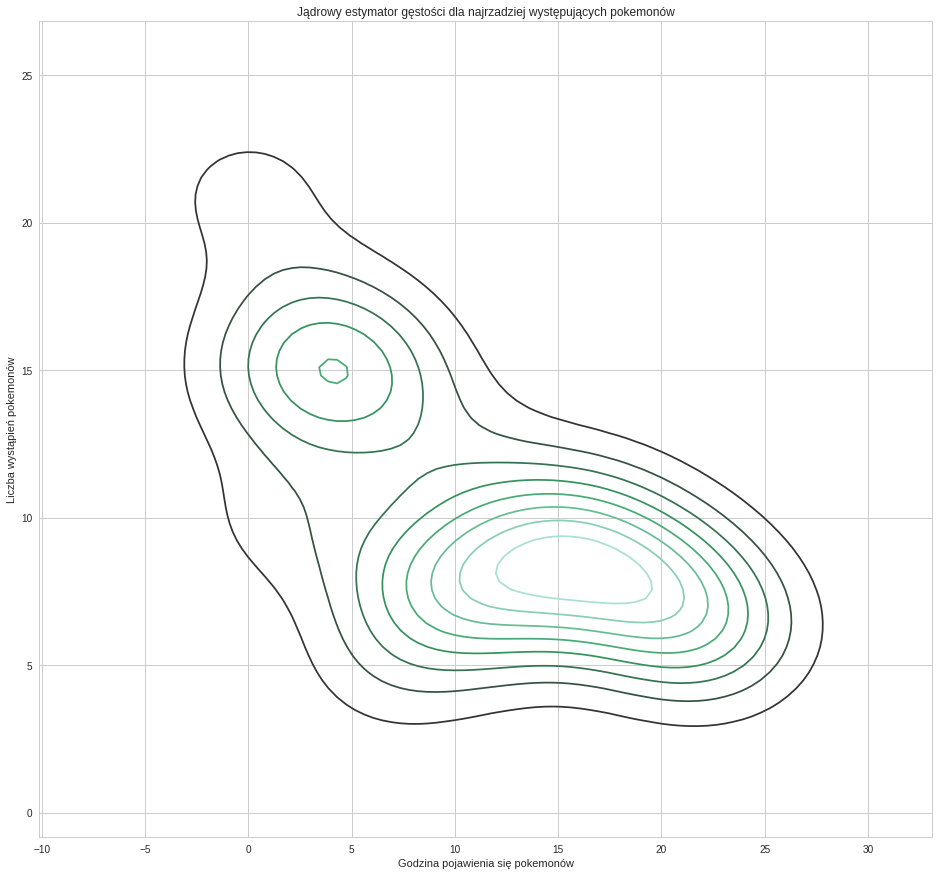

In [17]:
plot_kde_appeared_hour(rarest_pokes_ids, bw='silverman', name=u'najrzadziej')

<br>
<br>
Na podstawie wykresu można zauważyć, że rzadkie Pokemony najczęściej pojawiały się w bardzo późnych nocnych godzinach oraz w bardzo wczesnych porannych godzinach. Jest to czas od 24:00 - 6:00.
Poniżej zaprezentowano tabelę zawierającą godziny oraz liczbę wystąpień rzadkich Pokemonów w danym czasie. Następnie użyto do analizy występowania wykres jądrowego estymatowa gęstości.
<br>
<br>

<h3><center>Jądrowy estymator gęstości godziny występowania oraz liczby częstych Pokemonów</h3></center>
<br>
Poniżej zaprezentowano tabelę zawierającą godziny oraz liczbę wystąpień najczęstszych Pokemonów w danym czasie. Następnie użyto do analizy występowania wykres jądrowego estymatowa gęstości.  
<br>
<br>

In [ ]:
plot_kde_appeared_hour(most_common_pokes_ids, bw=(3, 600), name=u'najczęściej') #bw='silverman')

,appearedHour,Liczba wystąpień
0,0,12454
1,1,11552
2,2,9539
3,3,10902
4,4,12942
5,5,11156
6,6,9575
7,7,9151
8,8,9582
9,9,9003


<br>
<br>
Dla danych najczęściej występujących Pokemonów dane były bardziej przemieszane. W całym dniu częstość występowania była podobna - rzędu około 9000 sztuk, w określonych godzinach skakała jednak znacznie wyżej, lecz w kolejnej godzinie wracała do normy.  
Podobnie jednak jak dla rzadziej występujących Pokemonów tendencję wzrostową obserwuje się w godzinach późnowieczornych oraz wczesnoporannych. Po godzinie 5:00 stabilizuje się ona na poziomie 9000, następnie obserwujemy dwa wzrosty, a po nich wynik ponownie stabilizuje się aż do godziny 23:00.
<br>
<br>

<h3><center>Regresja liniowa czasu pojawienia się i liczby występień najrzadszych pokemonów</h3></center>

In [ ]:
rarest_regr = plot_appeared_hour_linear_regr(rarest_pokes_ids, name=u'najrzadszych')

<center><h3>Regresja liniowa czasu pojawienia się i liczby występień najczęstszych pokemonów</h3></center>

In [ ]:
most_regr = plot_appeared_hour_linear_regr(most_common_pokes_ids, name=u'najczęstszych')

<center><h3>Opis regresji liniowej</h3></center>
<br>
Biorąc pod uwagę wyliczone współczynniki korelacji między godziną a występowaniem Pokemonów dla obu grup - Pokemonów rzadkich i Pokemonów powszechnych, które wyszły ujemne, można powiedzieć że tendencja liniowa tych zbiorów jest następująca:
Wraz ze wzrostem godziny maleje ilość występujących Pokemonów. Jest to zgodne z poprzednią obserwacją - Pokemony pojawiają się najczęściej w godzinach 24 - 5. 
Wartość współczynnika korelacji dla częstości występowania Pokemonów powszechnych jest jednak dużo mniejsza niż dla Pokemonów rzadkich i wynosi ok. 0,5. Świadczy to o tym, że występowanie Pokemonów powszechnych jest mniej zależne od godziny.
Można również dostrzec rozrzut danych wokół prostej. Jest on jednak mniejszy dla Pokemonów rzadkich, których częstość wraz ze zmianą godziny zbliża się do prostej. 
<br><br>

<br><br>
<h1><center>Wnioski</h1></center>
<br>
Podczas analizy danych zauważyliśmy, że pokemony Pidgey, Rattata, oraz Weedle są najczęściej występującymi pokemonami na wszystkich obszarach. Liczba ich wystąpień jest wyraźnie wyższa od częstości wystąpień pozostałych Pokemonów. Pokrywa się to z danymi producenta.  
Najrzadszym pokemonem natomiast jest Farfetch’d, który wystąpił jedynie raz. Na tej podstawie można przypuszczać, że ilość danych dla najrzadszych Pokemonów mogła nie być reprezentatywna i należałoby zebrać dane ponownie na przykład korzystając z dłuższego okresu czasowego w celu zebrania większej ilości rekordów (w ciągu tygodnia na całym świecie udało się zaobserwować jedynie 241 pojawień najrzadszych Pokemonów, natomiast najczęstszych pojawiło się o wiele więcej, bo aż 236253). Ciekawą obserwacją jest to, że Farfetch'd pojawił się na pozostałych obszarach, a nie gdzie można by było się go spodziewać, ze względu na większą ogólną liczbę wystąpień rzadkich pokemonów - w Ameryce. Dalsza analiza oraz zbieranie danych byłyby konieczne w celu potwierdzenia hipotezy jakoby Farfetch'd miał największą szansę na pojawienie się na terytoriach oznaczonych jako "Pozostałe", ponieważ teraz z braku odpowiednich danych nie można wysnuć podobnego wniosku.

Porównując wykresy oraz estymatory dla różnych obszarów, można stwierdzić, że pokemony rzadkie różniły się istotnie częstością występowania na różnych obszarach, natomiast pokemony powszechne miały podobny rozkład występowania. Na terenie Ameryki pojawiało się więcej pokemonów rzadkich i pojawiały się niemal wszystkie. Natomiast w Europie i na pozostałych obszarach zaobserwowano braki w wystepowaniu niektórych rzadkich pokemonów. 
Dla konkretnych pokemonów powszechnych występowanie różniło się lekko w zależności od obszaru, jednak rozkład gęstości pozostawał taki sam. Daje to podstawy do stwiedzenia, że występowanie pokemonów powszechnych nie jest tak bardzo zależne od obszaru, na którym pokemon miałby się pojawić.

Ponadto zauważono, że zarówno rzadkie jak i najczęstsze Pokemony pojawiają się zazwyczaj w późnych godzinach nocnych oraz wczesnych godzinach porannych (okres od około 24:00 do 5:00). Często obserwuje się wtedy dwukrotną ilość ich pojawień w stosunku do późniejszych godzin, ale zawsze są one wyższe. Rozłożenie Pokemonów najczęstszych jest znacznie bardziej regularne, nie obserwuje się aż tak wysokich stosunków w różnicy liczebności Pokemonów w danych godzinach, ale tendencje wzrostowe również można zauważyć wcześnie rano. W obu grupach niewielki wzrost liczebności następuje po południu jest on jednak o wiele mniej zróżnicowany i opiera się na lekko zwiększonej ilości wystąpień w dwóch nienastępujących po sobie godzinach, pomiędzy którymi ilości występowania są zbliżone do średnich wartości.

Regresja liniowa dostarcza nam informacji o przewidywaniu wartości oczekiwanej dla pewnych zmiennych. Dzięki współczynnikowi korelacji udowodniliśmy, że częstość występowania jest zależna od godziny - silniej dla Pokemonów rzadkich, a słabiej dla Pokemonów powszechnych. Obie grupy mają tendencję spadkową, co wynika z ujemnego współczynnika korelacji.

